In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

In [2]:
f20 = pd.read_csv("filter20.csv").set_index('event')
f80 = pd.read_csv("filter80.csv").set_index('event')
exp = pd.read_csv("expert.csv").set_index('event')
cg = pd.read_csv("guide.csv")#.set_index('event')
com1 = pd.read_csv("communityres1.csv").set_index('event')
com2 = pd.read_csv("communityres2.csv").set_index('event')

In [3]:
f20[f20["Frequency (Top 20%)"]==1] = 30

In [4]:
f80[f80["Frequency (Covers 80%)"]==1] = 30
#cg[cg["Clinical Guidelines"]==1] = 30

In [5]:
cg = cg.drop_duplicates()
cg = cg.set_index('event')

In [6]:
cg[cg["Clinical Guidelines"]==1] = 30

In [7]:
groups = pd.concat([f20, f80, exp, cg, com1], axis=1)

In [8]:
groups.replace(0, np.nan, inplace=True)

In [9]:
groups=groups.sort_values(by=['Expert Knowledge'])

In [10]:
groupst = groups.T

In [314]:
groups.max()

Frequency (Top 20%)            30.0
Frequency (Covers 80%)         30.0
Expert Knowledge               31.0
Clinical Guidelines            30.0
Community Detection (Res 1)    14.0
dtype: float64

In [11]:
import random
random.seed(5)
custom = sns.color_palette("Spectral", 31)
random.shuffle(custom )
# Create a color palette with the custom muted colors
#custom_muted_palette = sns.color_palette(custom_muted_colors)

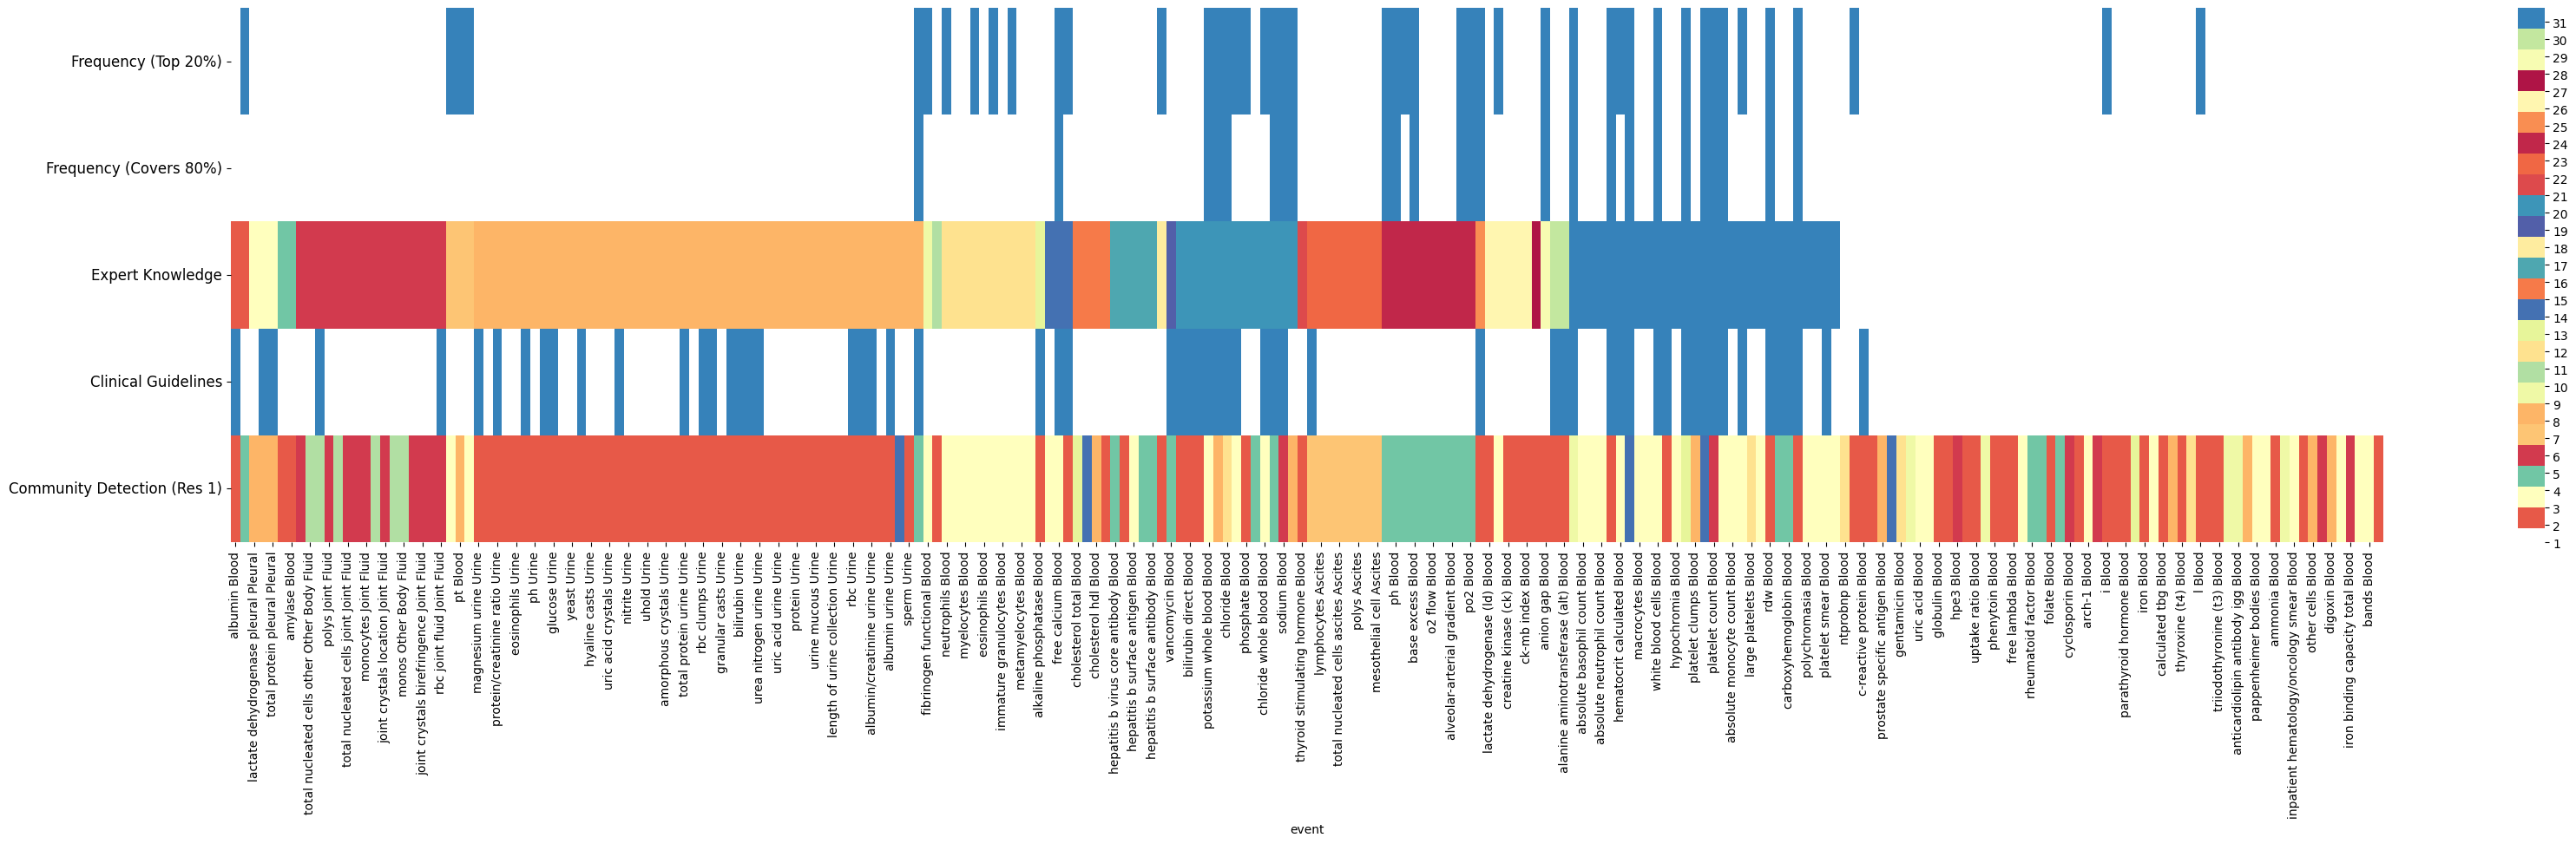

In [15]:
n = 31

# Create a color palette with n distinct colors
cmap = sns.color_palette(custom, 25)

plt.figure(figsize=(40, 8))  # Adjust the figure size as needed
ax = sns.heatmap(groupst, cmap=cmap)

# Get the colorbar object from the Seaborn heatmap
colorbar = ax.collections[0].colorbar

# Define custom tick positions and labels for the colorbar
ticks = np.arange(0.2, n, 1)  # Adjust the tick positions as needed
tick_labels = [str(i) for i in range(1, n + 1)]  # Adjust the labels as needed


ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)  # Adjust the fontsize as needed
# Set the ticks and labels on the colorbar
colorbar.set_ticks(ticks)
colorbar.set_ticklabels(tick_labels)
plt.savefig('eventgroups.png')
plt.show()

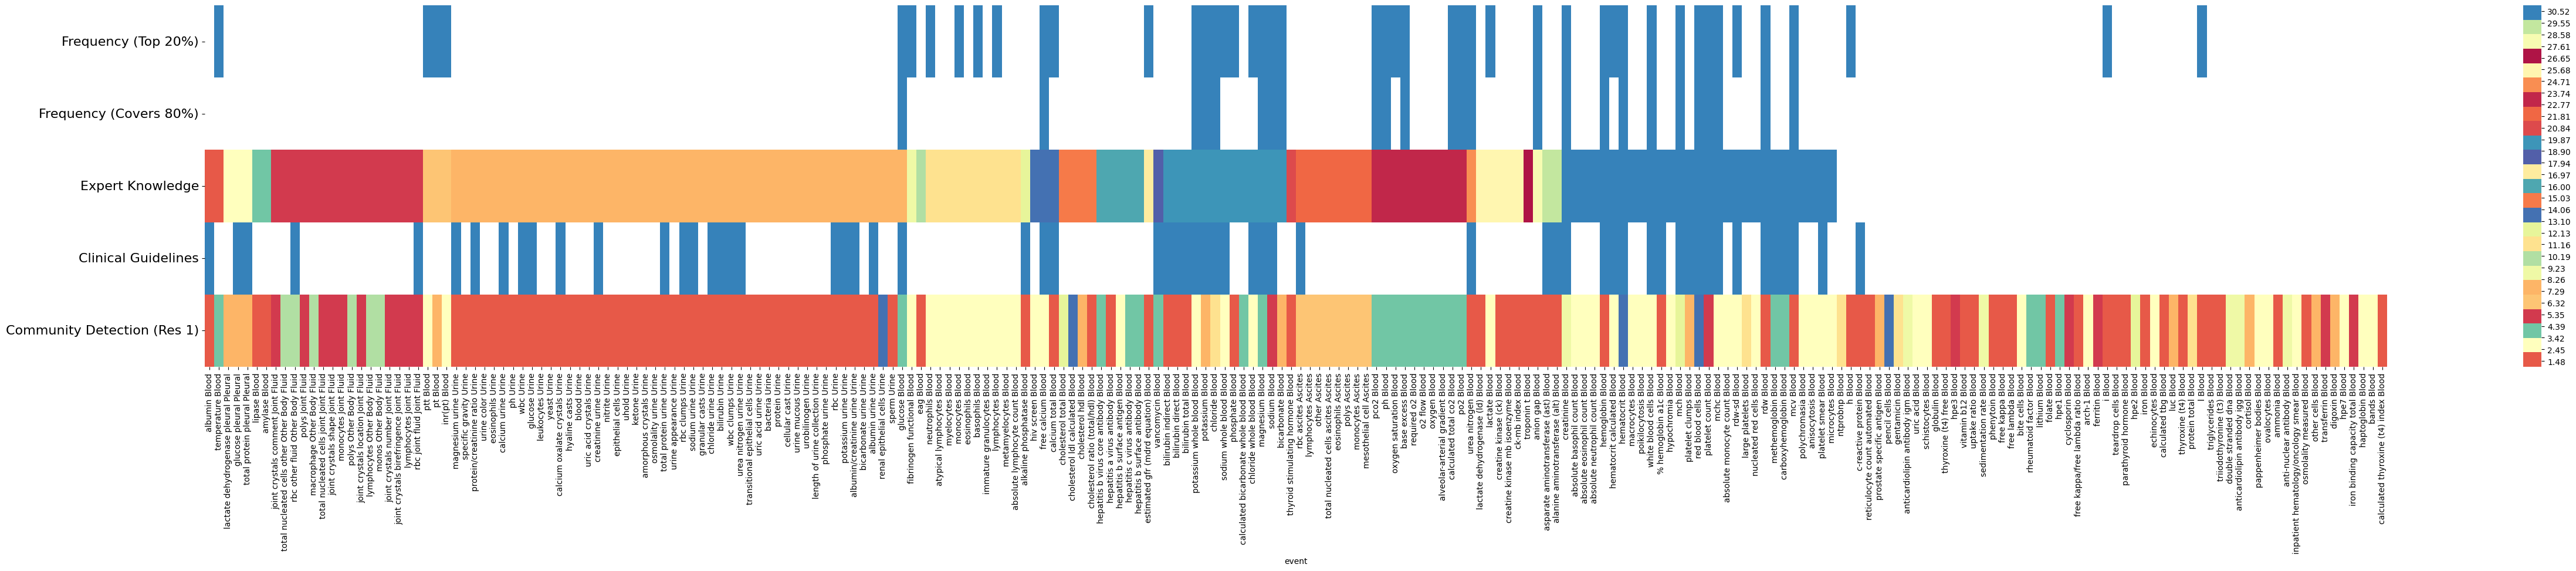

In [19]:
n=31
plt.figure(figsize = (60,8))
cmap = sns.color_palette(custom, 25)
ax = sns.heatmap(groupst, cmap=cmap)

ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=16)  # Adjust the fontsize as needed
# Get the colorbar object from the Seaborn heatmap
colorbar = ax.collections[0].colorbar
# The list comprehension calculates the positions to place the labels to be evenly distributed across the colorbar
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (n) + r * i / (n) for i in range(n)])
#colorbar.set_ticklabels(list(vmap.values()))
plt.show()

In [124]:
groups1 = groups.head(115)
groups2 = groups.tail(115)

In [125]:
groups1t = groups1.T
groups2t = groups2.T

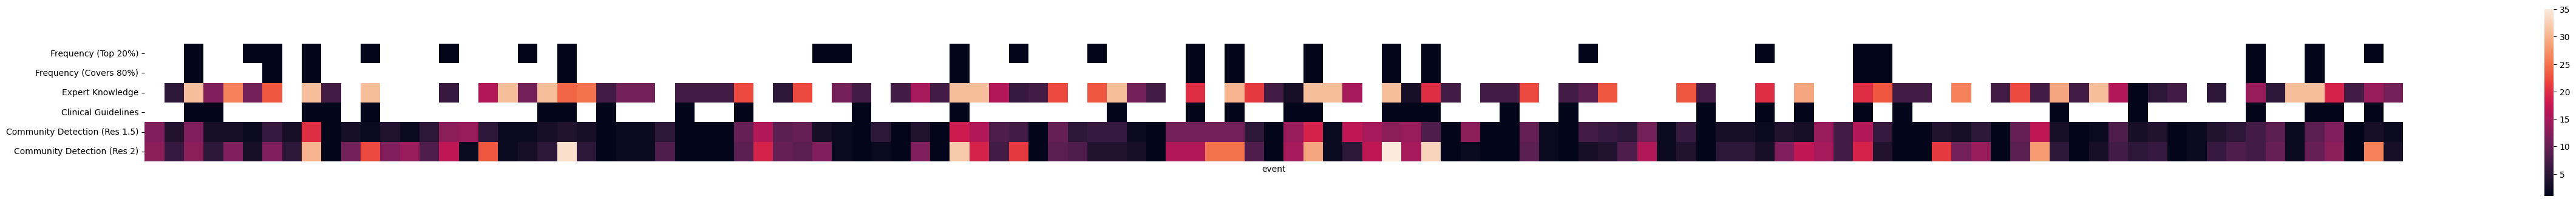

In [127]:
plt.figure(figsize = (60,4))
sns.heatmap(groups2t, square=True, xticklabels=False)
plt.show()